In [1]:
import pandas as pd
import numpy as np

In [2]:
target_date_str = '20150302'
target_datetime = pd.to_datetime(target_date_str, format='%Y%m%d')

orders_df = pd.read_json('../../luna_crash_dataset/luna/LUNA_FullChannel_GDAX_20220511_17hr.json', lines=True)

In [3]:
orders_df.head()

,order_id,order_type,size,price,client_oid,type,side,product_id,time,sequence,remaining_size,trade_id,maker_order_id,taker_order_id,reason,funds,old_size,new_size
0,04074a2a-ff4d-40f8-a921-d88ece5d1562,limit,281.146,2.06,0278c289-d977-44e0-9b3a-ff4e82b8dda5,received,buy,WLUNA-USD,2022-05-11T15:59:00.796073Z,1292598749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04074a2a-ff4d-40f8-a921-d88ece5d1562,NaN,NaN,2.06,NaN,open,buy,WLUNA-USD,2022-05-11T15:59:00.796073Z,1292598750,281.146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0299ed2d-d33d-4313-a1d4-b74ce9cc9f26,limit,2324.238,2.33,b1f276a7-e271-4c82-9fa7-a55451507f82,received,sell,WLUNA-USD,2022-05-11T15:59:00.813739Z,1292598751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,374.806,2.33,NaN,match,buy,WLUNA-USD,2022-05-11T15:59:00.813739Z,1292598752,NaN,7884080.0,474813db-2329-4aba-a07b-b1adea78da8f,0299ed2d-d33d-4313-a1d4-b74ce9cc9f26,NaN,NaN,NaN,NaN
4,474813db-2329-4aba-a07b-b1adea78da8f,NaN,NaN,2.33,NaN,done,buy,WLUNA-USD,2022-05-11T15:59:00.813739Z,1292598753,0.000,NaN,NaN,NaN,filled,NaN,NaN,NaN


In [4]:
orders_df.order_id.nunique()

252246

In [5]:
orders_df['time'] = pd.to_datetime(orders_df['time'])

In [6]:
aggregated_orders = orders_df[['order_id', 'reason', 'size', 'order_type', 'type', 'time']].groupby('order_id').agg({'order_type': list, 'type': list, 'reason': list, 'size': list, 'time': list})
aggregated_orders.shape

(252246, 5)

In [7]:
canceled_orders = aggregated_orders[aggregated_orders['reason'].apply(lambda x: 'canceled' in x)]
canceled_orders.shape

(209354, 5)

In [8]:
canceled_without_modifying = aggregated_orders[aggregated_orders['reason'].apply(lambda x: 'canceled' in x and len(x) == 3)].copy()
canceled_without_modifying.shape

(200462, 5)

In [9]:
from datetime import timedelta

In [10]:
canceled_without_modifying.loc[:, 'order_size'] = canceled_without_modifying['size'].apply(lambda x: x[0])
canceled_without_modifying.loc[:, 'duration'] = canceled_without_modifying.time.apply(lambda x: x[2] - x[0])
canceled_without_modifying.loc[:, 'duration_sec'] = canceled_without_modifying.duration.apply(lambda x: x.total_seconds())
canceled_without_modifying.loc[:, '10_sec'] = canceled_without_modifying.duration < timedelta(seconds=10)
canceled_without_modifying.loc[:, '5_sec'] = canceled_without_modifying.duration < timedelta(seconds=5)
canceled_without_modifying.loc[:, '3_sec'] = canceled_without_modifying.duration < timedelta(seconds=3)
canceled_without_modifying.loc[:, '2_sec'] = canceled_without_modifying.duration < timedelta(seconds=2)
canceled_without_modifying.loc[:, '1_sec'] = canceled_without_modifying.duration < timedelta(seconds=1)

In [11]:
canceled_without_modifying[canceled_without_modifying['10_sec']]

,order_type,type,reason,size,time,order_size,duration,duration_sec,10_sec,5_sec,3_sec,2_sec,1_sec
order_id,,,,,,,,,,,,,
0000aea6-1926-4596-b810-df71039df017,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[3358.185, nan, nan]","[2022-05-11 16:19:17.132505+00:00, 2022-05-11 ...",3358.185,0 days 00:00:00.030436,0.030436,True,True,True,True,True
0000e1a1-f834-41d8-ba95-0b8eaad30355,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[573.644, nan, nan]","[2022-05-11 16:38:03.835735+00:00, 2022-05-11 ...",573.644,0 days 00:00:02.229054,2.229054,True,True,True,False,False
0000fd86-31e6-419c-9003-a6d643cbe654,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[351.001, nan, nan]","[2022-05-11 16:57:08.191645+00:00, 2022-05-11 ...",351.001,0 days 00:00:01.002019,1.002019,True,True,True,True,False
000150b4-7477-41bc-ad88-16911b1e1c54,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[274.465, nan, nan]","[2022-05-11 16:06:18.924882+00:00, 2022-05-11 ...",274.465,0 days 00:00:00.950023,0.950023,True,True,True,True,True
00017fbd-e1ff-4960-9e5b-a59e38bf26f2,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[87.025, nan, nan]","[2022-05-11 16:30:46.229007+00:00, 2022-05-11 ...",87.025,0 days 00:00:00.350697,0.350697,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffda527-ad9d-4db8-88a7-8dc518420631,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[40.749, nan, nan]","[2022-05-11 16:07:11.203458+00:00, 2022-05-11 ...",40.749,0 days 00:00:00.006530,0.006530,True,True,True,True,True
fffdb569-7fd1-4ff9-8372-7af663e86d6a,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[392.059, nan, nan]","[2022-05-11 16:54:24.205317+00:00, 2022-05-11 ...",392.059,0 days 00:00:00.485349,0.485349,True,True,True,True,True
fffe054c-174a-4cd4-843e-d9e2cf401f6b,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[20.745, nan, nan]","[2022-05-11 16:43:35.394434+00:00, 2022-05-11 ...",20.745,0 days 00:00:00.147912,0.147912,True,True,True,True,True


In [12]:
from plot_utils import draw_order_size_histogram

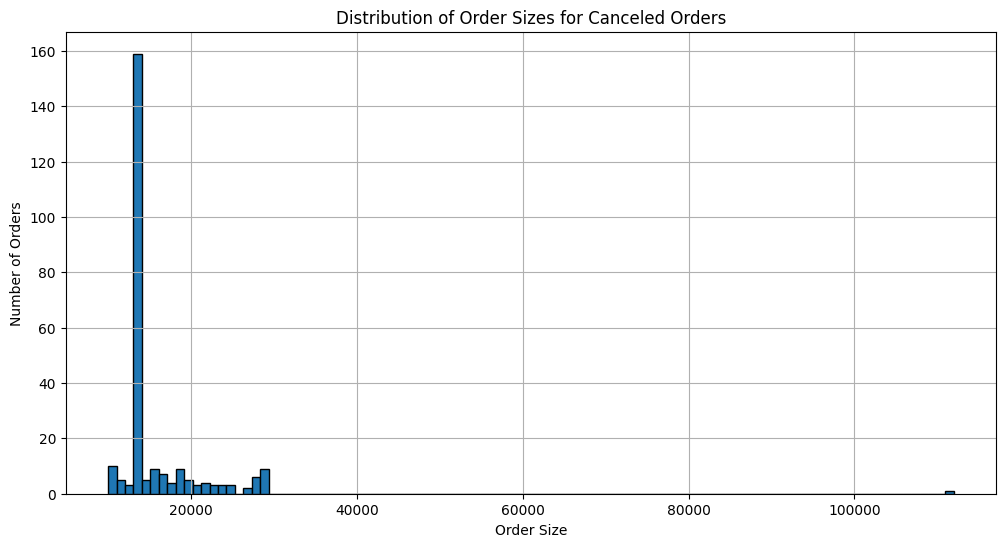

In [13]:
small_orders = canceled_without_modifying[canceled_without_modifying['order_size'] > 10000]

draw_order_size_histogram(small_orders)

In [14]:
%reload_ext autoreload
%autoreload 2
from plot_utils import plot_order_size_vs_time

### Big orders and duration before cancellation

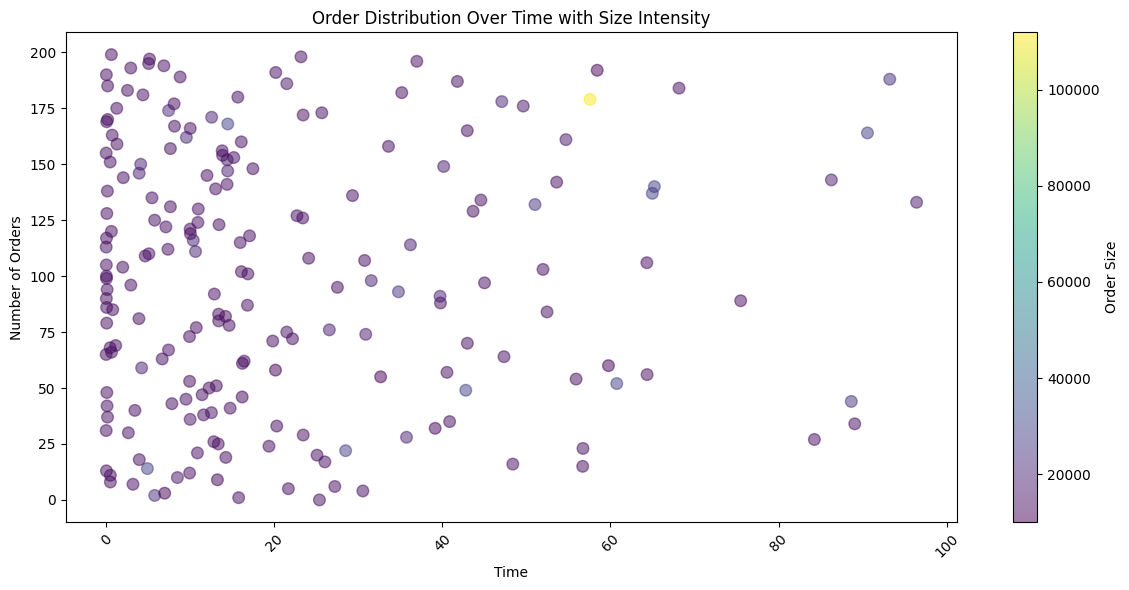

In [16]:
condition = (canceled_without_modifying.order_size > 10000) & (canceled_without_modifying.duration_sec < 100)
sampled_orders = canceled_without_modifying[condition].copy()

plot_order_size_vs_time(sampled_orders)

# plt.figure(figsize=(12, 6))
# scatter = plt.scatter(sampled_orders['duration_sec'],#sampled_orders['time'].apply(lambda x: x[0]),
#                      range(len(sampled_orders)), 
#                      c=sampled_orders['order_size'],
#                      cmap='viridis',
#                      alpha=0.5,
#                      s=70) # Make points larger to compensate for fewer points
# plt.colorbar(scatter, label='Order Size')
# plt.title('Order Distribution Over Time with Size Intensity')
# plt.xlabel('Time') 
# plt.ylabel('Number of Orders')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


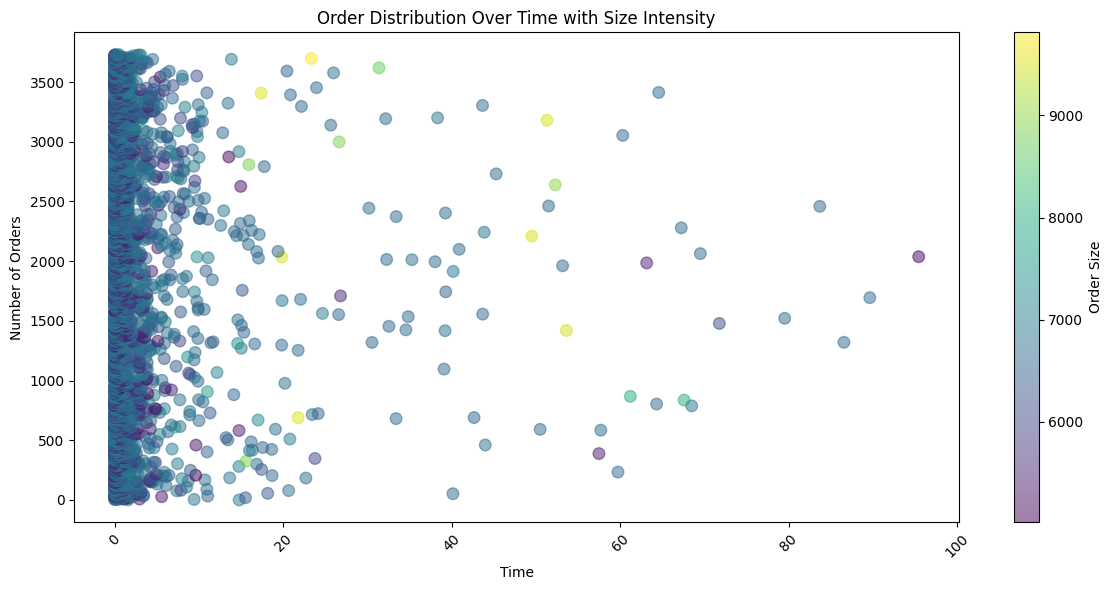

In [17]:
condition = ((canceled_without_modifying.order_size > 5000) &
             (canceled_without_modifying.order_size < 10000) &
             (canceled_without_modifying.duration_sec < 100))
sampled_orders = canceled_without_modifying[condition].copy()

plot_order_size_vs_time(sampled_orders)

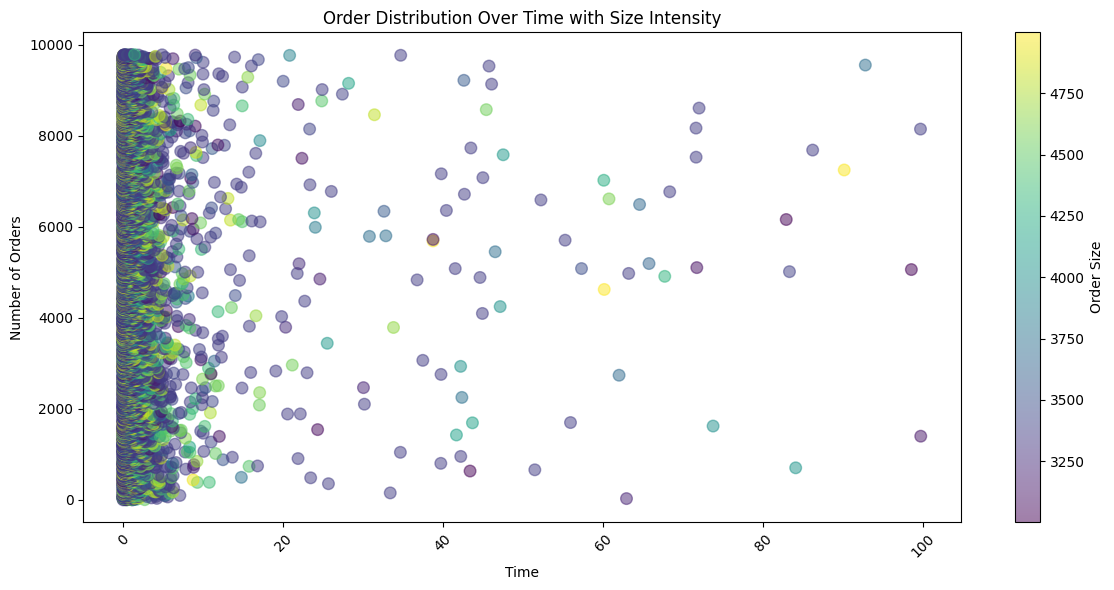

In [18]:
condition = ((canceled_without_modifying.order_size > 3000) &
             (canceled_without_modifying.order_size < 5000) &
             (canceled_without_modifying.duration_sec < 100))
sampled_orders = canceled_without_modifying[condition].copy()

plot_order_size_vs_time(sampled_orders)

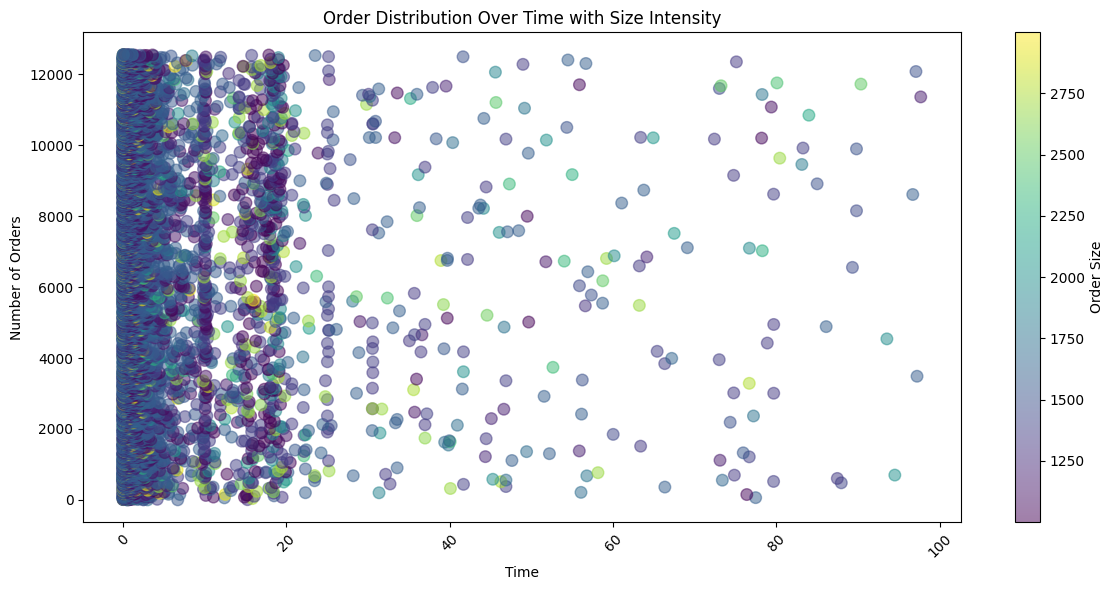

In [19]:
condition = ((canceled_without_modifying.order_size > 1000) &
             (canceled_without_modifying.order_size < 3000) &
             (canceled_without_modifying.duration_sec < 100))
sampled_orders = canceled_without_modifying[condition].copy()

plot_order_size_vs_time(sampled_orders)

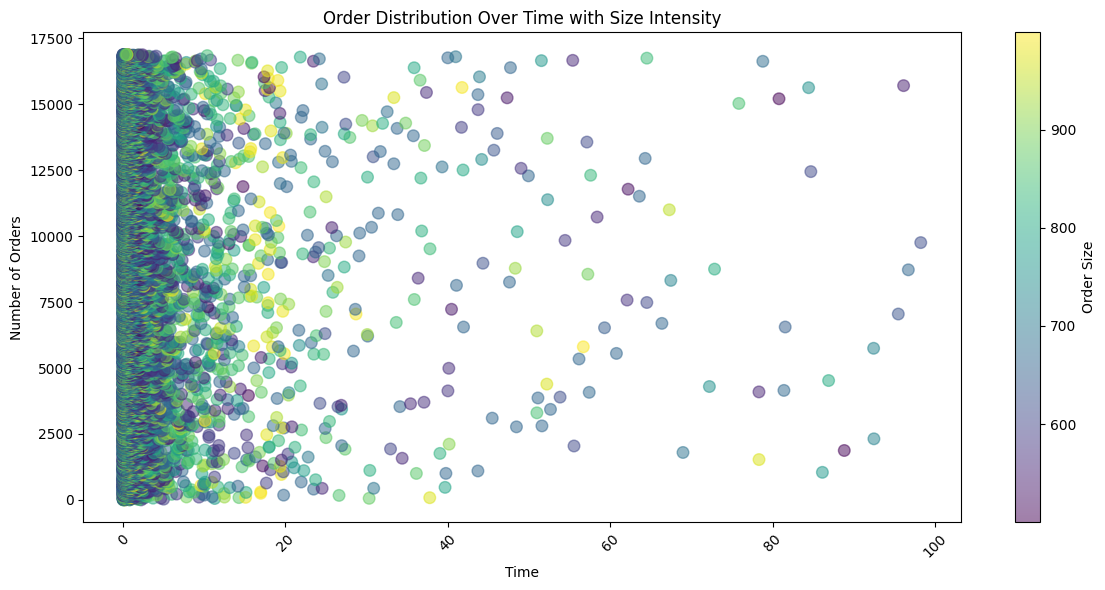

In [20]:
condition = ((canceled_without_modifying.order_size > 500) &
             (canceled_without_modifying.order_size < 1000) &
             (canceled_without_modifying.duration_sec < 100))
sampled_orders = canceled_without_modifying[condition].copy()

plot_order_size_vs_time(sampled_orders)

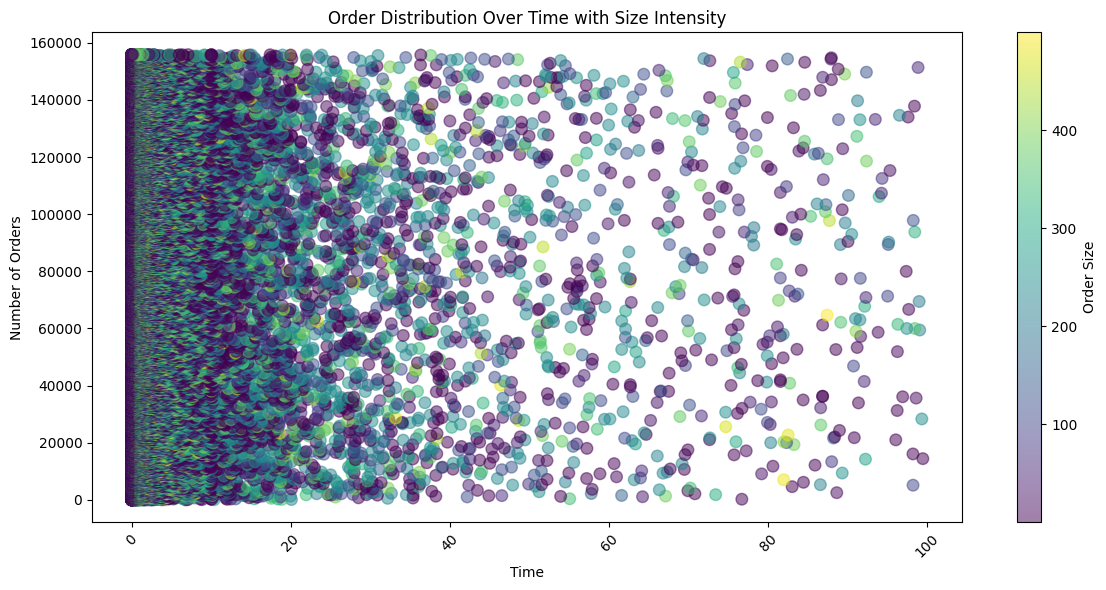

In [21]:
condition = ((canceled_without_modifying.order_size < 500) &
             (canceled_without_modifying.duration_sec < 100))
sampled_orders = canceled_without_modifying[condition].copy()

plot_order_size_vs_time(sampled_orders)

In [ ]:
canceled_10_seconds = aggregated_orders[aggregated_orders['reason'].apply(lambda x: 'canceled' in x and len(x) == 3 and (canceled_without_modifying.time.iloc[0][2] - canceled_without_modifying.time.iloc[0][0]) < timedelta(seconds=10))]
canceled_10_seconds.shape

In [16]:
filled_orders = aggregated_orders[aggregated_orders['reason'].apply(lambda x: 'filled' in x)]
filled_orders.shape

(40702, 4)

In [12]:
immediate_canceled = aggregated_orders[aggregated_orders['reason'].apply(lambda x: 'canceled' in x and len(x) == 2)]
immediate_canceled.shape

(8020, 4)

In [13]:
immediate_filled = aggregated_orders[aggregated_orders['reason'].apply(lambda x: 'filled' in x and len(x) == 2)]
immediate_filled.shape

(14521, 4)

The done value in the type column typically indicates that an order is no longer active on the order book. This can occur because the order has been either completely filled or canceled.  
The "type": "open" message indicates that an order has been accepted and is now active on the order book, but has not been completely filled  


In [34]:
aggregated_orders[aggregated_orders['reason'].apply(lambda x: 'canceled' in x and len(x) == 3)]

,order_type,type,reason,size
order_id,,,,
0000aea6-1926-4596-b810-df71039df017,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[3358.185, nan, nan]"
0000e1a1-f834-41d8-ba95-0b8eaad30355,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[573.644, nan, nan]"
0000fd86-31e6-419c-9003-a6d643cbe654,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[351.001, nan, nan]"
000150b4-7477-41bc-ad88-16911b1e1c54,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[274.465, nan, nan]"
00017fbd-e1ff-4960-9e5b-a59e38bf26f2,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[87.025, nan, nan]"
...,...,...,...,...
fffda527-ad9d-4db8-88a7-8dc518420631,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[40.749, nan, nan]"
fffdb569-7fd1-4ff9-8372-7af663e86d6a,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[392.059, nan, nan]"
fffe054c-174a-4cd4-843e-d9e2cf401f6b,"[limit, nan, nan]","[received, open, done]","[nan, nan, canceled]","[20.745, nan, nan]"


In [35]:
orders_df[orders_df.type == 'open']

,order_id,order_type,size,price,client_oid,type,side,product_id,time,sequence,remaining_size,trade_id,maker_order_id,taker_order_id,reason,funds,old_size,new_size
1,04074a2a-ff4d-40f8-a921-d88ece5d1562,NaN,NaN,2.06,NaN,open,buy,WLUNA-USD,2022-05-11T15:59:00.796073Z,1292598750,281.146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,101ee809-99e4-4022-98c1-d80f411162a3,NaN,NaN,2.37,NaN,open,sell,WLUNA-USD,2022-05-11T15:59:00.838232Z,1292598759,7.182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,abd8b405-98e0-4a6e-815a-8c09fd1da1e2,NaN,NaN,2.32,NaN,open,buy,WLUNA-USD,2022-05-11T15:59:00.839172Z,1292598761,7.182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,df4ec280-7d72-4f13-a79f-4f09bfeed96f,NaN,NaN,2.33,NaN,open,buy,WLUNA-USD,2022-05-11T15:59:00.847887Z,1292598763,14.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,a3639fac-a675-4524-9536-49aa27b2ed85,NaN,NaN,2.36,NaN,open,sell,WLUNA-USD,2022-05-11T15:59:00.857286Z,1292598779,11.525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768214,b5596166-b563-4e36-b775-773e678000dd,NaN,NaN,2.40,NaN,open,sell,WLUNA-USD,2022-05-11T16:59:52.778285Z,1293366963,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768216,388fc2d5-8ebd-4be4-a736-d779469672e7,NaN,NaN,2.38,NaN,open,sell,WLUNA-USD,2022-05-11T16:59:52.802931Z,1293366965,5921.662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768219,c020534d-fa26-422d-8b41-01a87074baea,NaN,NaN,2.39,NaN,open,sell,WLUNA-USD,2022-05-11T16:59:52.823598Z,1293366968,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768222,823244b2-a098-4ac2-9ed0-996ed408e92d,NaN,NaN,2.41,NaN,open,sell,WLUNA-USD,2022-05-11T16:59:52.832965Z,1293366971,10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
orders_df[orders_df.order_id == 'abd8b405-98e0-4a6e-815a-8c09fd1da1e2']

,order_id,order_type,size,price,client_oid,type,side,product_id,time,sequence,remaining_size,trade_id,maker_order_id,taker_order_id,reason,funds,old_size,new_size
11,abd8b405-98e0-4a6e-815a-8c09fd1da1e2,limit,7.182,2.32,23842a81-b87d-4c6d-94a1-13d813e34ed0,received,buy,WLUNA-USD,2022-05-11T15:59:00.839172Z,1292598760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,abd8b405-98e0-4a6e-815a-8c09fd1da1e2,NaN,NaN,2.32,NaN,open,buy,WLUNA-USD,2022-05-11T15:59:00.839172Z,1292598761,7.182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,abd8b405-98e0-4a6e-815a-8c09fd1da1e2,NaN,NaN,2.32,NaN,done,buy,WLUNA-USD,2022-05-11T15:59:00.904876Z,1292598791,7.182,NaN,NaN,NaN,canceled,NaN,NaN,NaN


### Feature building

In [34]:
labeled_orders = orders_df.merge(canceled_without_modifying, on='order_id', how='left')
labeled_orders.columns

Index(['order_id', 'order_type_x', 'size_x', 'price', 'client_oid', 'type_x',
       'side', 'product_id', 'time_x', 'sequence', 'remaining_size',
       'trade_id', 'maker_order_id', 'taker_order_id', 'reason_x', 'funds',
       'old_size', 'new_size', 'order_type_y', 'type_y', 'reason_y', 'size_y',
       'time_y', 'order_size', 'duration', 'duration_sec', '10_sec', '5_sec',
       '3_sec', '2_sec', '1_sec', 'is_canceled'],
      dtype='object')

### Filter only limit and opened orders

In [87]:
canceled_without_modifying[~canceled_without_modifying['10_sec'] & (canceled_without_modifying.order_size > 10000)].shape

(173, 14)

In [78]:
orders_df[orders_df['size'] > 1000]

,order_id,order_type,size,price,client_oid,type,side,product_id,time,sequence,remaining_size,trade_id,maker_order_id,taker_order_id,reason,funds,old_size,new_size
2,0299ed2d-d33d-4313-a1d4-b74ce9cc9f26,limit,2324.238,2.33,b1f276a7-e271-4c82-9fa7-a55451507f82,received,sell,WLUNA-USD,2022-05-11 15:59:00.813739+00:00,1292598751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,78f6bcaa-737e-48a1-857c-cf990d21eac5,limit,13301.188,2.10,c895ac0b-563b-47f7-a7c8-13f1ff1fffff,received,buy,WLUNA-USD,2022-05-11 15:59:00.873332+00:00,1292598780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,7bd37eb5-60de-4562-a959-b8dc01d99b9f,limit,1328.620,1.75,eca14780-31f6-4cb4-a917-13f5ff56ffff,received,buy,WLUNA-USD,2022-05-11 15:59:00.940094+00:00,1292598801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,00e810cf-27f7-4657-acd9-6c24e4ee1a41,limit,6810.127,3.69,292e27f0-7b2b-4b23-85e2-23f1ff12ffff,received,sell,WLUNA-USD,2022-05-11 15:59:00.955773+00:00,1292598807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,db99f71e-a864-46f5-8d78-63ae4ce3502f,limit,6770.164,2.09,6f634742-516b-4363-a1b3-13f2ff35ffff,received,buy,WLUNA-USD,2022-05-11 15:59:00.955773+00:00,1292598809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768038,02a6025b-4958-4c88-8385-512212942dd4,limit,1937.397,2.32,10ab89e2-ddc2-451a-820b-0bf003585682,received,sell,WLUNA-USD,2022-05-11 16:59:51.692432+00:00,1293366787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768045,NaN,NaN,1800.008,2.32,NaN,match,buy,WLUNA-USD,2022-05-11 16:59:51.692432+00:00,1293366794,NaN,7922469.0,550274b0-7a63-4dfb-b4c3-ffc6a12a44df,02a6025b-4958-4c88-8385-512212942dd4,NaN,NaN,NaN,NaN
768064,5c89d9c3-f6e1-4316-8e1d-e7cbf8b6ad8a,limit,3998.963,2.37,6a20b1bc-077d-47fc-ea37-2f690777f2b3,received,sell,WLUNA-USD,2022-05-11 16:59:51.727168+00:00,1293366813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768123,38eb7ae3-3904-4f49-8d5e-7d559e71aecd,limit,1103.876,2.40,ec81dbaa-3525-4162-8680-f9182f60a637,received,sell,WLUNA-USD,2022-05-11 16:59:52.004238+00:00,1293366872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
aggregated_orders.shape

(252246, 5)

In [52]:
labeled_orders[labeled_orders.is_canceled.isna()].type_x # & (labeled_orders.order_type_x == '')].shape

2         received
3            match
4             done
5            match
6             done
            ...   
768267        done
768268    received
768269       match
768270        done
768271       match
Name: type_x, Length: 166886, dtype: object